In [22]:
import h5py
import numpy as np
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt


# %hist -o -g -f ipython_history.md

In [4]:
def get_matlab_data(file_path, is_label: bool):
    """reading a .mat file to extract the images or the labels"""

    

    with h5py.File(file_path, 'r') as f:
        
        print(f"Started reading {file_path} . . . ")
    
        data_keys =  list(f.keys())[1]
        refs = f[data_keys][0][:] # get object references
        num_of_examples = len(refs)
    
        if is_label: # Check if the this is a labels file
            examples_data =  np.array(
                [''.join(map(chr, np.squeeze(f[refs[i]]))) for i in range(num_of_examples)]
                ) 
        else: # If not labels file
            examples_data =  np.array(
                [np.transpose(np.array(f[refs[i]])) for i in range(num_of_examples)]
                ) # Taking all  

        print(f"Completed reading {file_path}")    
    
    return examples_data


In [5]:
# Get features
train_data = get_matlab_data('Data/train_data.mat', is_label=False)
validation_data = get_matlab_data('Data/val_data.mat', is_label=False)
test_data = get_matlab_data('Data/test_data.mat', is_label=False)

Started reading Data/train_data.mat . . . 
Completed reading Data/train_data.mat
Started reading Data/val_data.mat . . . 
Completed reading Data/val_data.mat
Started reading Data/test_data.mat . . . 
Completed reading Data/test_data.mat


In [6]:
print(f"The training data has a shape of {train_data.shape}")
print(f"The validation data has a shape of {validation_data.shape}")
print(f"The test data has a shape of {test_data.shape}")

The training data has a shape of (29894, 128, 128)
The validation data has a shape of (3733, 128, 128)
The test data has a shape of (3733, 128, 128)


In [25]:
# Get labels
train_label = get_matlab_data('Data/train_labels.mat', is_label=True)
validation_label = get_matlab_data('Data/val_labels.mat', is_label=True)
test_label = get_matlab_data('Data/test_labels.mat', is_label=True)

Started reading Data/train_labels.mat . . . 
Completed reading Data/train_labels.mat
Started reading Data/val_labels.mat . . . 
Completed reading Data/val_labels.mat
Started reading Data/test_labels.mat . . . 
Completed reading Data/test_labels.mat


In [13]:
def minmaxscaler(data, global_min, global_max):
    """Normlising examples between 0-1 using the global minimum and maximum"""    
    return (data - global_min)/(global_max - global_min)

In [14]:
# Normalising the data

global_min = np.amin(np.concatenate((train_data, test_data, validation_data)))
global_max = np.amax(np.concatenate((train_data, test_data, validation_data)))

train_data_scaled = minmaxscaler(train_data, global_min, global_max)
test_data_scaled = minmaxscaler(test_data, global_min, global_max)
validation_data_scaled = minmaxscaler(validation_data, global_min, global_max)

In [21]:
np.amin(validation_data_scaled)


0.06029964675567249

C:\Users\nyasha\anaconda3\envs\masters\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

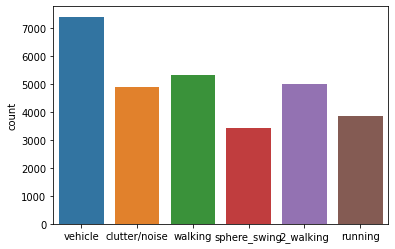

In [26]:
sns.countplot(train_label)

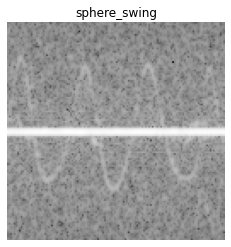

In [160]:
from numpy import random

image_num = random.randint(len(train_data))
random_image = train_data[image_num]
plt.imshow(random_image, cmap='gray')
plt.title(f'{train_label[image_num]}')
plt.axis('off')
plt.show()

(array([5.00000000e+01, 1.67500000e+03, 8.68000000e+04, 4.59905100e+06,
        1.70081737e+08, 2.61865389e+08, 3.54172920e+07, 1.55985050e+07,
        1.85834100e+06, 2.74456000e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

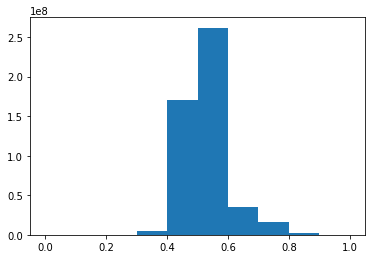

In [165]:
plt.hist(train_data_scaled.flatten())

In [168]:
np.where(train_label == 'walking')

(array([12297, 12298, 12299, ..., 17602, 17603, 17604], dtype=int64),)

In [ ]:
train_data[]

In [171]:
walking_data = train_data_scaled[np.where(train_label == 'walking')]

(array([1.1000000e+02, 2.3690000e+03, 4.9745000e+04, 1.0822050e+06,
        1.9561016e+07, 5.3346883e+07, 6.7682400e+06, 3.6783300e+06,
        2.3165410e+06, 1.6083300e+05]),
 array([0.09242383, 0.17012385, 0.24782386, 0.32552388, 0.40322389,
        0.48092391, 0.55862392, 0.63632394, 0.71402395, 0.79172397,
        0.86942398]),
 <BarContainer object of 10 artists>)

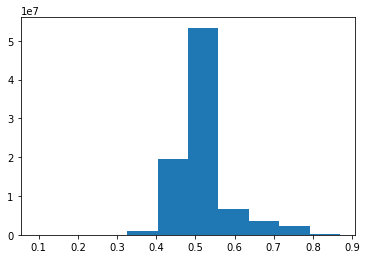

In [172]:
plt.hist(walking_data.flatten())

In [ ]:
# Can create box and whisker plots based on this data